In [1]:
import pyodbc
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
import csv
from csv import writer
from csv import reader
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
pyodbc.drivers()

['ODBC Driver 18 for SQL Server']

In [3]:
conn = pyodbc.connect( 
    driver='{ODBC Driver 18 for SQL Server}', 
    server='localhost', 
    database='FAIRFIELDUDW', 
    uid='sa', 
    pwd='Strong.Pwd-123', 
    encrypt='yes', 
    TrustServerCertificate='Yes')

In [4]:
cursor = conn.cursor()

In [13]:
sql_1 = 'select distinct fact.*, crime.OFFENSE_DESCRIPTION, house.Neighborhood_HousingPrice from dbo.Fact_Housing_Crime_Boston fact, dbo.Dimension_Crime crime, dbo.Dimension_NeighborhoodHousing house where crime.CRIME_INCIDENT_ID = fact.CRIME_INCIDENT_ID and house.Neighborhood_Name = fact.OCCURRED_ON_NEIGHBORHOOD and house.NeighborhoodHousing_Date = fact.Neighborhoodhousing_Date'
ml_data = pd.read_sql(sql_1,conn)
ml_data = ml_data[['CRIME_INCIDENT_ID', 'OCCURRED_ON_NEIGHBORHOOD', 'YEAR', 'MONTH', 'OFFENSE_DESCRIPTION', 'Neighborhood_HousingPrice']]
ml_data.head()

,CRIME_INCIDENT_ID,OCCURRED_ON_NEIGHBORHOOD,YEAR,MONTH,OFFENSE_DESCRIPTION,Neighborhood_HousingPrice
0,102095489,Hyde Park,2019,11,INVESTIGATE PERSON,472871.0
1,120200013,North End,2020,1,DISTURBING THE PEACE/ DISORDERLY CONDUCT/ GATH...,794218.0
2,120221042,Roslindale,2021,4,SICK/INJURED/MEDICAL - PERSON,611459.0
3,182198873,Roxbury,2019,12,M/V - LEAVING SCENE - PROPERTY DAMAGE,485510.0
4,190258751,Roxbury,2019,10,DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE,486404.0


In [12]:
sql_1 = 'select distinct fact.*, crime.OFFENSE_DESCRIPTION, house.Neighborhood_HousingPrice from dbo.Fact_Housing_Crime_Boston fact, dbo.Dimension_Crime crime, dbo.Dimension_NeighborhoodHousing house where crime.CRIME_INCIDENT_ID = fact.CRIME_INCIDENT_ID and house.Neighborhood_Name = fact.OCCURRED_ON_NEIGHBORHOOD and house.NeighborhoodHousing_Date = fact.Neighborhoodhousing_Date'
ml_data = pd.read_sql(sql_1,conn)
ml_data = ml_data[['CRIME_INCIDENT_ID', 'OCCURRED_ON_NEIGHBORHOOD', 'YEAR', 'MONTH', 'OFFENSE_DESCRIPTION', 'Neighborhood_HousingPrice']]
ml_data.head()

,CRIME_INCIDENT_ID,OCCURRED_ON_NEIGHBORHOOD,YEAR,MONTH,OFFENSE_DESCRIPTION,Neighborhood_HousingPrice
0,102091671,Dorchester,2019,11,THREATS TO DO BODILY HARM,538230.5
1,121033495,South Boston,2021,5,DISTURBING THE PEACE/ DISORDERLY CONDUCT/ GATH...,797020.0
2,122043183,Dorchester,2020,6,TRESPASSING,546840.5
3,129099936,Roxbury,2019,11,FRAUD - CREDIT CARD / ATM FRAUD,486143.0
4,172096419,Charlestown,2019,10,WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,800110.0


In [11]:
ml_data.head()

,CRIME_INCIDENT_ID,OCCURRED_ON_NEIGHBORHOOD,YEAR,MONTH,OFFENSE_DESCRIPTION,Neighborhood_HousingPrice
0,102096818,Downtown,2019,11,VAL - VIOLATION OF AUTO LAW,1200122.0
1,10637224,Roxbury,2021,1,WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPL...,533879.0
2,121005808,Roxbury,2021,1,FRAUD - FALSE PRETENSE / SCHEME,533879.0
3,121055112,Jamaica Plain,2021,8,PROPERTY - LOST/ MISSING,702365.0
4,129100024,Longwood,2019,12,PROPERTY - LOST/ MISSING,634930.0


In [8]:
ml_data['OFFENSE_DESCRIPTION'].unique()

array(['THREATS TO DO BODILY HARM',
       'DISTURBING THE PEACE/ DISORDERLY CONDUCT/ GATHERING CAUSING ANNOYANCE/ NOISY PAR',
       'TRESPASSING', 'FRAUD - CREDIT CARD / ATM FRAUD',
       'WARRANT ARREST - OUTSIDE OF BOSTON WARRANT',
       'DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE',
       'WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPLEMENTAL)',
       'M/V ACCIDENT - PROPERTY DAMAGE',
       'SICK ASSIST - DRUG RELATED ILLNESS',
       'LARCENY THEFT OF MV PARTS & ACCESSORIES', 'INVESTIGATE PROPERTY',
       'Migrated Report - Drugs - Possession/Manufacturing/Distribute',
       'Migrated Report - Auto Law Violation',
       'Migrated Report - Other Part III',
       'Migrated Report - Motor Vehicle Crash',
       'Migrated Report - Weapons Violation',
       'SICK/INJURED/MEDICAL - PERSON', 'ASSAULT - SIMPLE', 'ROBBERY',
       'M/V - LEAVING SCENE - PROPERTY DAMAGE', 'OTHER OFFENSE',
       'LARCENY THEFT FROM BUILDING', 'TOWED MOTOR VEHICLE',
       'BREAKING AND ENTERING 

In [9]:
violent_crimes = ['THREATS TO DO BODILY HARM','ASSAULT - AGGRAVATED','DISORDERLY CONDUCT','ASSAULT SIMPLE - BATTERY','ARSON', 'ROBBERY - STREET','ASSAULT - AGGRAVATED - BATTERY', 'ASSAULT - SIMPLE','FUGITIVE FROM JUSTICE',
       'HARASSMENT','BURGLARY - RESIDENTIAL - FORCE','KIDNAPPING - ENTICING OR ATTEMPTED','ROBBERY - BANK', 'WEAPON - FIREARM - SALE / TRAFFICKING', 'HOME INVASION',
       'KILLING OF FELON BY POLICE','ASSAULT & BATTERY', 'ROBBERY ATTEMPT - KNIFE - BANK','ASSAULT & BATTERY D/W - OTHER','ASSAULT D/W - KNIFE ON POLICE OFFICER','VIOLATION - HARASSMENT PREVENTION ORDER''Migrated Report - Robbery']
drug_crimes = ['DRUGS - SICK ASSIST - HEROIN','DRUGS - POSS CLASS D','DRUGS - POSS CLASS C - INTENT TO MFR DIST DISP','DRUGS - POSS CLASS A - HEROIN, ETC. ','DANGEROUS OR HAZARDOUS CONDITION', 'DRUGS - POSS CLASS E',
       'DRUGS - SICK ASSIST - OTHER HARMFUL DRUG','DRUGS - SALE / MANUFACTURING','OPERATING UNDER THE INFLUENCE DRUGS','DRUGS - POSS CLASS B - COCAINE, ETC.','DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP','DRUGS - POSSESSION','DRUGS - CONSP TO VIOL CONTROLLED SUBSTANCE',
       'DRUGS - POSS CLASS E - INTENT TO MFR DIST DISP','DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP','DRUGS - POSSESSION OF DRUG PARAPHANALIA','DRUGS - SICK ASSIST - OTHER NARCOTIC','DRUGS - POSS CLASS D - INTENT TO MFR DIST DISP','DRUGS - CLASS A TRAFFICKING OVER 18 GRAMS','DRUGS - POSS CLASS E INTENT TO MF DIST DISP', 'DRUGS - POSS CLASS D - MARIJUANA, ETC.','DRUGS - POSS CLASS D - INTENT MFR DIST DISP','DRUGS - CLASS D TRAFFICKING OVER 50 GRAMS','DRUGS - GLUE INHALATION','DRUGS - POSSESSION/ SALE/ MANUFACTURING/ USE']
housing_crimes = ['LARCENY THEFT FROM BUILDING','ARSON','STOLEN PROPERTY - BUYING / RECEIVING / POSSESSING',
       'PROPERTY - STOLEN THEN RECOVERED','PROPERTY - MISSING','BURGLARY - RESIDENTIAL - FORCE',
       'BURGLARY - RESIDENTIAL - NO FORCE','BURGLARY - RESIDENTIAL - ATTEMPT','BURGLARY - COMMERICAL - NO FORCE','ROBBERY - HOME INVASION','POSSESSION OF BURGLARIOUS TOOLS','BURGLARY - OTHER - ATTEMPT','B&E RESIDENCE DAY - NO PROP TAKEN','PROPERTY - LOST/ MISSING','BURGLARY - COMMERICAL','BURGLARY - RESIDENTIAL','BREAKING AND ENTERING (B&E) MOTOR VEHICLE (NO PROPERTY STOLEN)','Migrated Report - Robbery','Migrated Report - Burglary/Breaking and Entering']

In [10]:
def counter (year, month, neighborhood):
    df = ml_data
    df = df.loc[df['YEAR']== year]
    df = df.loc[df['MONTH'] == month]
    df = df.loc[df['OCCURRED_ON_NEIGHBORHOOD'] == neighborhood]
    counter = len(df.index)
    df_violent = df[df.OFFENSE_DESCRIPTION.isin(violent_crimes)]
    df_drug = df[df.OFFENSE_DESCRIPTION.isin(drug_crimes)]
    df_housing = df[df.OFFENSE_DESCRIPTION.isin(housing_crimes)]
    violent_counter = len(df_violent.index)
    drug_counter = len(df_drug.index)
    housing_counter = len(df_housing.index)
    price = df['Neighborhood_HousingPrice'].unique().tolist()
    csv_file = open("DataWarehouseCountsFinalSet2.csv", "a")
    writer = csv.writer(csv_file)
    row = []
    row.append(neighborhood)
    row.append(year)
    row.append(month)
    row.append(counter)
    row.append(violent_counter)
    row.append(drug_counter)
    row.append(housing_counter)
    row.append(str(price))
    writer.writerow(row)

In [11]:
years = [2015,2016, 2017, 2018,2019, 2020, 2021]
months = [1,2,3,4,5,6,7,8,9,10,11,12]
neighborhoods = ['Roxbury', 'Dorchester', 'South End', 'Hyde Park', 'Back Bay', 'Brighton',
 'Downtown', 'East Boston' ,'Mattapan', 'Roslindale' ,'West Roxbury',
 'North End' ,'Leather District', 'Allston', 'South Boston', 'Fenway',
 'Jamaica Plain' ,'Mission Hill', 'Charlestown', 'West End', 'Beacon Hill',
 'Longwood', 'Bay Village' ,'Chinatown'] 
for i in years:
    for j in months:
        for k in neighborhoods:
            counter(i, j, k)

In [12]:
df_test = pd.read_csv('DataWarehouseCountsFinalSet2.csv')
df_test.columns = ['Neighborhood', 'Year', 'Month', 'Total Crimes', 
                   'Violent Crime', 'Drug Crime', 'Housing Crime', 'Price']

In [13]:
df_test = df_test.loc[df_test['Total Crimes'] != 0]
df_test['Price'] = df_test['Price'].str.strip('[]')
df_test['Price'] = df_test['Price'].astype(float)

In [14]:
df_test.head()

,Neighborhood,Year,Month,Total Crimes,Violent Crime,Drug Crime,Housing Crime,Price
119,Roxbury,2015,6,548,86,27,33,363875.0
120,Dorchester,2015,6,1020,140,50,69,375281.5
121,South End,2015,6,192,22,7,18,794833.0
122,Hyde Park,2015,6,173,31,14,8,354930.0
123,Back Bay,2015,6,200,20,2,19,1027725.0


In [15]:
len(df_test)

1631

In [16]:
conditions = [
    df_test['Price'] >= 1200000,
    (df_test['Price'] < 1200000) & (df_test['Price'] >= 800000),
    (df_test['Price'] < 800000) & (df_test['Price'] >= 500000), 
    (df_test['Price'] < 500000)
]
values = [
    'Very High',
    'High', 
    'Medium', 
    'Low'
]
df_test['Price Cluster'] = np.select(conditions, values)

In [17]:
df_test.head()

,Neighborhood,Year,Month,Total Crimes,Violent Crime,Drug Crime,Housing Crime,Price,Price Cluster
119,Roxbury,2015,6,548,86,27,33,363875.0,Low
120,Dorchester,2015,6,1020,140,50,69,375281.5,Low
121,South End,2015,6,192,22,7,18,794833.0,Medium
122,Hyde Park,2015,6,173,31,14,8,354930.0,Low
123,Back Bay,2015,6,200,20,2,19,1027725.0,High


In [18]:
df_test.to_csv('Data Set for Tableau.csv')

In [19]:
new_df = df_test

In [20]:
new_df.isnull().sum()
new_df['Neighborhood'].fillna(new_df['Neighborhood'].mode()[0], inplace = True)
new_df['Price'].fillna(new_df['Price'].mode()[0], inplace = True)
new_df['Year'].fillna(new_df['Year'].mode()[0], inplace = True)
new_df['Month'].fillna(new_df['Month'].mode()[0], inplace = True)
new_df['Total Crimes'].fillna(new_df['Total Crimes'].mode()[0], inplace = True)
new_df['Violent Crime'].fillna(new_df['Violent Crime'].mode()[0], inplace = True)
new_df['Housing Crime'].fillna(new_df['Housing Crime'].mode()[0], inplace = True)
new_df['Drug Crime'].fillna(new_df['Drug Crime'].mode()[0], inplace = True)
new_df['Price Cluster'].fillna(new_df['Price Cluster'].mode()[0], inplace = True)
new_df.isnull().sum

<bound method DataFrame.sum of       Neighborhood   Year  Month  Total Crimes  Violent Crime  Drug Crime  \
119          False  False  False         False          False       False   
120          False  False  False         False          False       False   
121          False  False  False         False          False       False   
122          False  False  False         False          False       False   
123          False  False  False         False          False       False   
...            ...    ...    ...           ...            ...         ...   
1938         False  False  False         False          False       False   
1939         False  False  False         False          False       False   
1940         False  False  False         False          False       False   
1941         False  False  False         False          False       False   
1942         False  False  False         False          False       False   

      Housing Crime  Price  Price Cluster  


In [21]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
new_df['Price Cluster'] = lb_make.fit_transform(new_df['Price Cluster'])

In [42]:
label = new_df['Price Cluster']
features = new_df[['Total Crimes', 'Violent Crime', 'Housing Crime', 'Drug Crime']]
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)

In [43]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
Y_pred_rf = forest_model.predict(X_test)
accuracy = forest_model.score(X_test, y_test)
print(accuracy)

0.654434250764526


In [44]:
from xgboost import XGBClassifier

In [45]:
xgbc = XGBClassifier(max_depth = 7)
xgbc.fit(X_train, y_train)
xg_predict = xgbc.predict(X_test)
accuracy = xgbc.score(X_test, y_test)
print(accuracy)

0.6636085626911316


[0.22464184 0.345092   0.23236273 0.19790341]


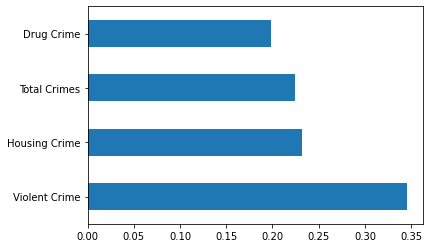

In [26]:
print(xgbc.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(xgbc.feature_importances_, index=features.columns)
feat_importances.nlargest(4).plot(kind='barh')
plt.show()